In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
day_0 = pd.read_csv("prices_round_3_day_0.csv", sep=";")
day_1 = pd.read_csv("prices_round_3_day_1.csv", sep=";")
day_2 = pd.read_csv("prices_round_3_day_2.csv", sep=";")

all_days = pd.concat([day_0,day_1,day_2], ignore_index=True)
print(all_days.head())

   day  timestamp       product  bid_price_1  bid_volume_1  bid_price_2  \
0    0          0     CHOCOLATE         7999           111          NaN   
1    0          0  STRAWBERRIES         3999           210          NaN   
2    0          0         ROSES        14999            72          NaN   
3    0          0   GIFT_BASKET        71348            19      71347.0   
4    0        100   GIFT_BASKET        71344             1      71343.0   

   bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  ask_volume_1  \
0           NaN          NaN           NaN         8001           111   
1           NaN          NaN           NaN         4001           210   
2           NaN          NaN           NaN        15001            72   
3          24.0          NaN           NaN        71362            19   
4          12.0      71342.0          20.0        71355             1   

   ask_price_2  ask_volume_2  ask_price_3  ask_volume_3  mid_price  \
0          NaN           NaN          Na

In [3]:
roses = all_days[all_days['product'] == "ROSES"].reset_index()
gifts = all_days[all_days['product'] == "GIFT_BASKET"].reset_index()

In [4]:
mid_price = pd.DataFrame({
    "Roses": roses['mid_price'],
    "Gifts": gifts['mid_price']
}, index = roses.index)
print(mid_price.head())

     Roses    Gifts
0  15000.0  71355.0
1  15000.0  71349.5
2  15000.5  71347.0
3  15000.0  71350.5
4  14997.5  71341.5


In [26]:
spread =  mid_price['Gifts']- mid_price['Roses']
print(spread)

0        56355.0
1        56349.5
2        56346.5
3        56350.5
4        56344.0
          ...   
29995    55125.0
29996    55121.5
29997    55131.5
29998    55129.5
29999    55144.5
Length: 30000, dtype: float64


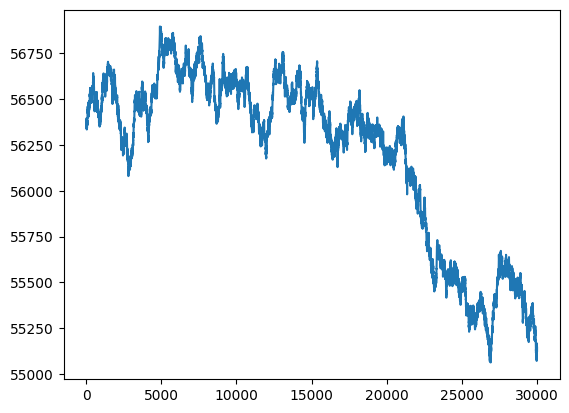

In [27]:
plt.plot(spread)

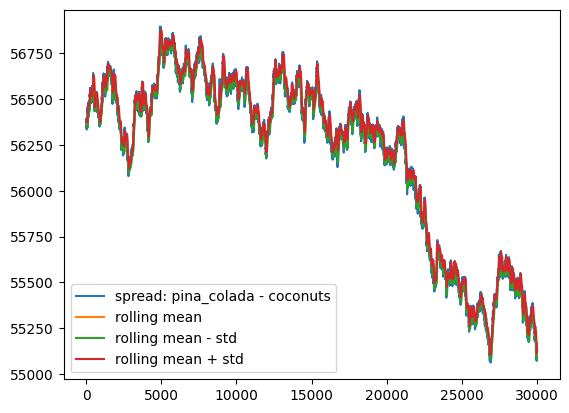

In [28]:
window = 50
spread.plot(label = "spread: pina_colada - coconuts")

avg_rolling_spread = spread.rolling(window)\
    .mean()

mov_spread5 = spread

rolling_std_spread = spread.rolling(window)\
    .std()

avg_rolling_spread.plot(label = "rolling mean")
(avg_rolling_spread - rolling_std_spread).plot(label = "rolling mean - std")
(avg_rolling_spread + rolling_std_spread).plot(label = "rolling mean + std")

plt.legend()

<Axes: >

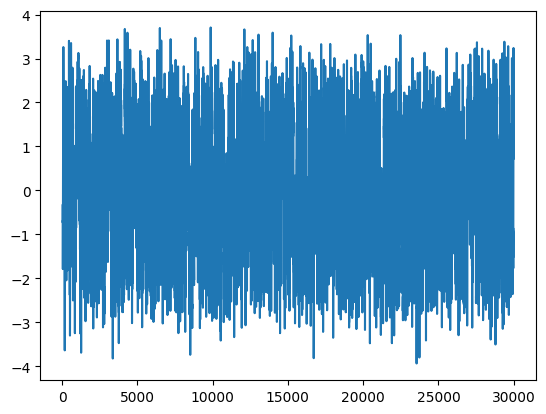

In [29]:
((spread - avg_rolling_spread)/rolling_std_spread)\
    .plot()

In [42]:
buy = (mov_spread5 - avg_rolling_spread)/rolling_std_spread < -3.0
sell = (mov_spread5 - avg_rolling_spread)/rolling_std_spread > 3.0

In [39]:
from statsmodels.tsa.stattools import coint, adfuller
print(adfuller(spread))

(-0.4524983047195852, 0.9009575871862889, 1, 29998, {'1%': -3.430568009855954, '5%': -2.8616363544632057, '10%': -2.566821286540422}, 206144.8781637327)


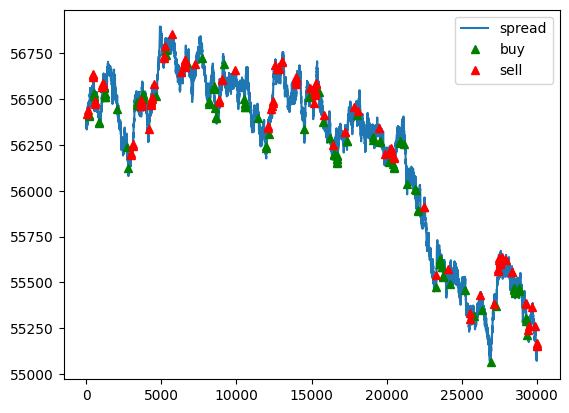

In [43]:
spread_plot = spread

spread_plot.plot(label = 'spread')
spread_plot[buy].plot(
    marker ='^', 
    color ='green', 
    linestyle= 'None',
    label = 'buy'
)
spread_plot[sell].plot(
    marker= '^', 
    color = 'red', 
    linestyle= 'None',
    label = 'sell'
)

plt.legend()
plt.show()

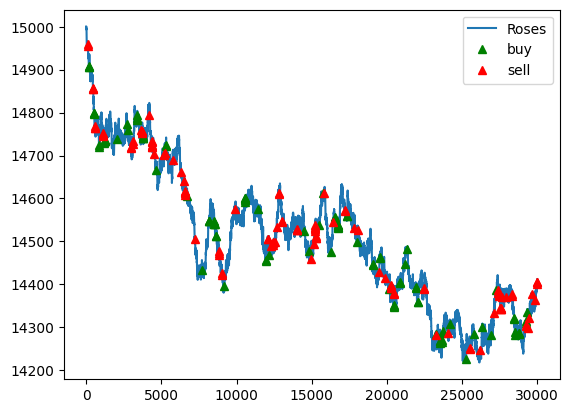

In [44]:
roses_plot = mid_price['Roses']
roses_plot.plot(label = 'Roses')
roses_plot[buy].plot(
    marker ='^', 
    color ='green', 
    linestyle= 'None',
    label = 'buy'
)
roses_plot[sell].plot(
    marker= '^', 
    color = 'red', 
    linestyle= 'None',
    label = 'sell'
)

plt.legend()
plt.show()